In [1]:
import pandas as pd
import numpy as np
import glob
import gc
import matplotlib.pyplot as plt
from matplotlib import colors
from astropy.coordinates import SkyCoord, AltAz, angular_separation
import astropy.units as u
from scipy.stats import binned_statistic
from scipy.signal import lombscargle
import h5py
from astropy.io import fits
from astropy.table import Table

In [2]:
h5f = h5py.File('../OSA_DL1DataCheck_LongTerm/20241204/DL1_datacheck_20241204.h5','r+')

In [3]:
print("Keys: %s" % h5f.keys())

Keys: <KeysViewHDF5 ['cosmics', 'cosmics_intensity_spectrum', 'flatfield', 'pedestals', 'pixwise_runsummary', 'pixwise_runsummary_no_stars', 'runsummary']>


In [4]:
df=pd.read_hdf('../OSA_DL1DataCheck_LongTerm/20241204/DL1_datacheck_20241204.h5', 'cosmics_intensity_spectrum') 

In [5]:
df

,yyyymmdd,ra_tel,dec_tel,cos_zenith,az_tel,runnumber,subrun,time,elapsed_time,corrected_elapsed_time,...,ZD_corrected_delta_cosmics_rate_at_422_pe,cosmics_spectral_index,delta_cosmics_spectral_index,ZD_corrected_cosmics_spectral_index,intensity_spectrum_fit_p_value,intensity_at_reference_rate,light_yield,diffuse_nsb_std,num_star_affected_pixels,anomalous_low_intensity_peak
0,20241204,41.064501,-0.005449,0.797653,2.378335,20041,0,1.733347e+09,8.833271,8.833271,...,0.023203,-2.346833,0.084365,-2.269334,0.616953,413.529390,0.964398,1.749114,53,False
1,20241204,41.064550,-0.005423,0.797890,2.379190,20041,1,1.733347e+09,8.942268,8.942268,...,0.031848,-2.312604,0.112746,-2.235212,0.345918,419.273428,0.988339,1.750060,52,False
2,20241204,41.064651,-0.005396,0.798127,2.380047,20041,2,1.733347e+09,8.908253,8.908253,...,0.040850,-2.558089,0.145635,-2.480804,0.139576,416.534656,0.978398,1.747256,52,False
3,20241204,41.064241,-0.005642,0.798366,2.380929,20041,3,1.733347e+09,9.071558,9.071558,...,0.039752,-2.381962,0.138082,-2.304785,0.159753,421.411926,0.997540,1.748930,52,False
4,20241204,41.064371,-0.005578,0.798606,2.381799,20041,4,1.733347e+09,9.035974,9.035974,...,0.010465,-2.518380,0.037143,-2.441311,0.948581,419.411836,0.989634,1.748351,52,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,20241204,165.900177,-23.874309,0.569933,2.809891,20059,82,1.733379e+09,8.917266,8.917266,...,0.026160,-2.277102,0.139894,-2.079076,0.475638,345.998566,0.682093,2.024050,10,False
1534,20241204,165.900340,-23.874153,0.570085,2.810564,20059,83,1.733379e+09,8.726165,8.726165,...,0.035143,-2.740804,0.187190,-2.542870,0.218178,355.869430,0.755095,2.022998,10,False
1535,20241204,165.900007,-23.874303,0.570231,2.811233,20059,84,1.733379e+09,8.446649,8.446649,...,0.035584,-2.556127,0.191892,-2.358282,0.220792,351.840190,0.729282,2.027673,10,False
1536,20241204,165.899982,-23.874326,0.570373,2.811877,20059,85,1.733379e+09,8.191182,8.191182,...,0.031798,-2.451987,0.166725,-2.254227,0.333453,350.324763,0.715654,2.034760,10,False


In [14]:
df.keys()

Index(['yyyymmdd', 'ra_tel', 'dec_tel', 'cos_zenith', 'az_tel', 'runnumber',
       'subrun', 'time', 'elapsed_time', 'corrected_elapsed_time',
       'delta_t_exp_index', 'cosmics_rate', 'cosmics_cleaned_rate',
       'intensity_at_half_peak_rate', 'intensity_at_peak_rate',
       'ZD_corrected_intensity_at_half_peak_rate', 'cosmics_peak_rate',
       'ZD_corrected_cosmics_peak_rate', 'cosmics_rate_at_422_pe',
       'delta_cosmics_rate_at_422_pe', 'ZD_corrected_cosmics_rate_at_422_pe',
       'ZD_corrected_delta_cosmics_rate_at_422_pe', 'cosmics_spectral_index',
       'delta_cosmics_spectral_index', 'ZD_corrected_cosmics_spectral_index',
       'intensity_spectrum_fit_p_value', 'intensity_at_reference_rate',
       'light_yield', 'diffuse_nsb_std', 'num_star_affected_pixels',
       'anomalous_low_intensity_peak'],
      dtype='object')

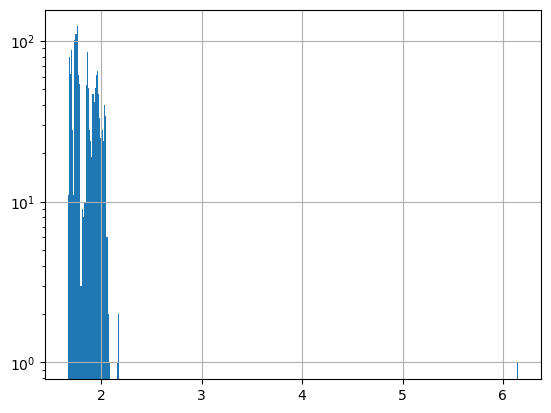

In [6]:
ax = df['diffuse_nsb_std'].hist(bins=400)
#ax.set_xlim(1,10)
ax.set_yscale("log")

In [6]:
dat = Table.read('../muons_DL1_tar_gz/fefs/aswg/data/real/DL1/20231006/v0.10/muons/muons_LST-1.Run14932.fits', format='fits')
df_muons = dat.to_pandas()

In [7]:
df_muons.keys()

Index(['event_id', 'event_time', 'mc_energy', 'ring_size', 'size_outside',
       'ring_center_x', 'ring_center_y', 'ring_radius', 'ring_width',
       'good_ring', 'muon_efficiency', 'ring_containment', 'ring_completeness',
       'impact_parameter', 'impact_x_array', 'impact_y_array', 'radial_stdev',
       'radial_skewness', 'radial_excess_kurtosis', 'num_pixels_in_ring',
       'mean_pixel_charge_around_ring', 'hg_peak_sample', 'lg_peak_sample'],
      dtype='object')

In [8]:
df_muons

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,8795,1.696640e+09,-1,1799.955688,0.0,0.121167,1.224513,1.028731,0.071384,True,...,5.505880,1.598937,5.268598e+00,0.058393,-0.073246,0.008860,342,0.610869,12,0
1,9377,1.696640e+09,-1,2051.665527,0.0,-0.594032,-0.808691,1.205283,0.109438,True,...,8.121141,-7.172593,3.808785e+00,0.058608,0.329478,0.236709,464,0.255329,11,0
2,11188,1.696640e+09,-1,1361.210083,0.0,-1.279059,0.822034,0.942094,0.056464,True,...,3.336372,2.894463,-1.659355e+00,0.050873,-0.229531,-0.125514,243,-0.014971,12,0
3,16004,1.696640e+09,-1,1495.712036,0.0,-0.935704,-1.947606,1.098101,0.075057,True,...,8.108323,-0.828564,-8.065878e+00,0.063815,-0.727235,0.450402,201,0.285824,13,0
4,18392,1.696640e+09,-1,1309.803711,0.0,0.600090,1.934240,1.164748,0.066805,True,...,3.343904,-3.343904,1.939560e-08,0.056042,-0.117697,0.868864,233,0.131741,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,5024288,1.696641e+09,-1,1724.783081,0.0,-0.008661,-0.737075,1.070652,0.091264,True,...,7.826377,7.741472,-1.149687e+00,0.061972,0.305964,-0.170568,396,-0.066117,12,0
6166,5024558,1.696641e+09,-1,1787.743042,0.0,1.039415,-0.477390,1.192047,0.082745,True,...,8.319190,4.913307,-6.713295e+00,0.056016,0.766601,0.843756,425,0.021120,12,0
6167,5024694,1.696641e+09,-1,975.306458,0.0,2.407751,0.045962,1.083845,0.121157,True,...,6.891538,-4.508493,5.212176e+00,0.089216,-0.399266,-0.418319,170,0.069645,11,0
6168,5024875,1.696641e+09,-1,1805.732422,0.0,0.974171,1.011449,1.174743,0.065952,True,...,8.506378,-6.822808,5.080134e+00,0.045967,-0.266889,0.064587,347,0.439506,12,0


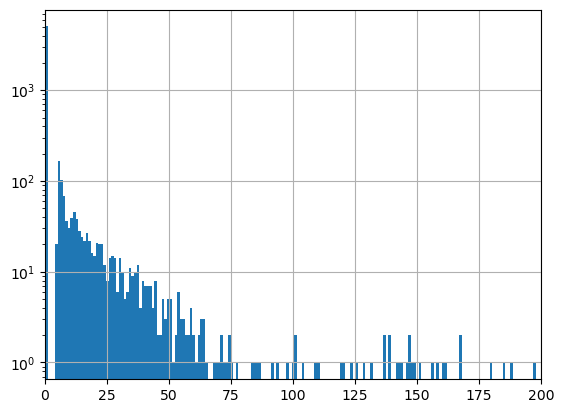

In [9]:
ax = df_muons['size_outside'].hist(bins=1000)
ax.set_xlim(0,200)
ax.set_yscale("log")

(0.1, 0.3)

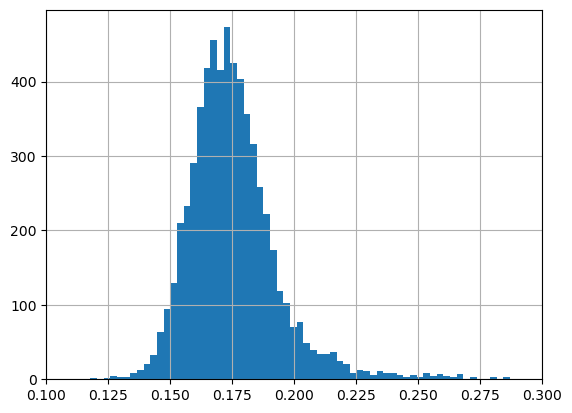

In [10]:
ax = df_muons['muon_efficiency'].hist(bins=10000)
ax.set_xlim(0.1,0.3)
#ax.set_yscale("log")

(0.0, 0.2)

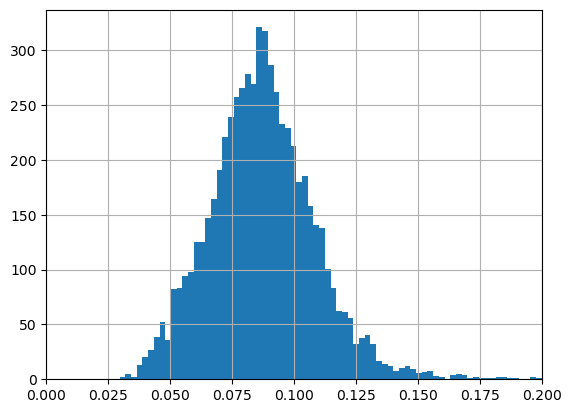

In [11]:
ax = df_muons['ring_width'].hist(bins=10000)
ax.set_xlim(0.0,0.2)
#ax.set_yscale("log")

(-1.0, 2.0)

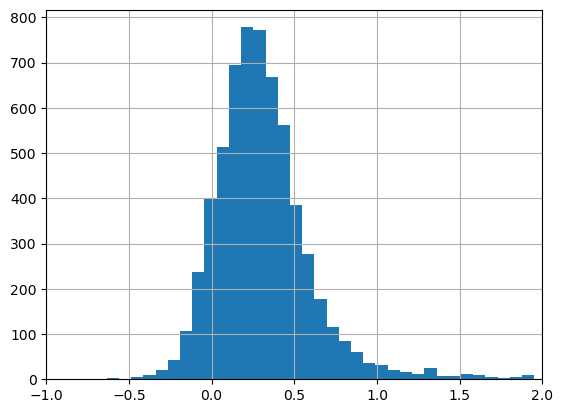

In [12]:
ax = df_muons['mean_pixel_charge_around_ring'].hist(bins=100)
ax.set_xlim(-1.0,2)
#ax.set_yscale("log")

In [13]:
#ax = df_muons[''].hist(bins=100)
#ax.set_xlim(-1.0,2)
#ax.set_yscale("log")

KeyError: ''

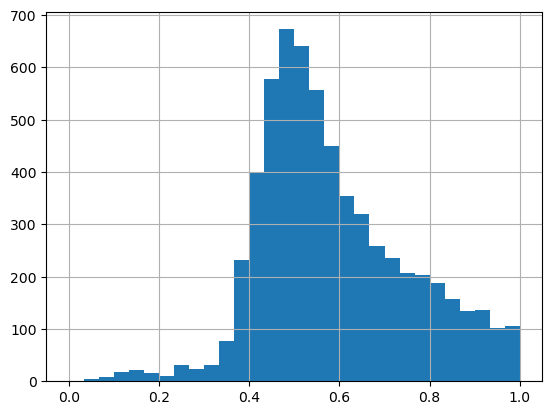

In [24]:
ax=df_muons['ring_completeness'].hist(bins=30)
#ax.set_xlim(1,10)
#ax.set_yscale("log")

(0.75, 1.3)

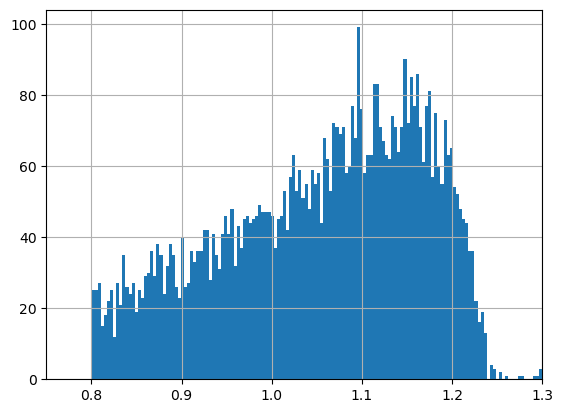

In [28]:
ax=df_muons['ring_radius'].hist(bins=200)
ax.set_xlim(0.75,1.3)
#ax.set_yscale("log")

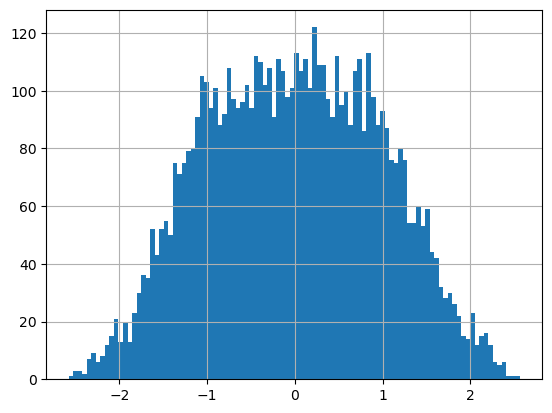

In [30]:
ax = df_muons['ring_center_x'].hist(bins=100)
#ax.set_xlim(0,200)
#ax.set_yscale("log")

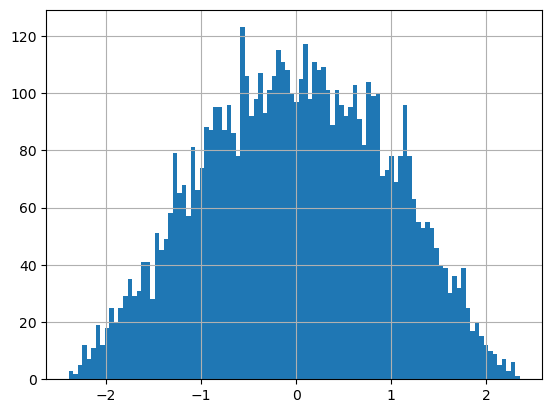

In [31]:
ax = df_muons['ring_center_y'].hist(bins=100)
#ax.set_xlim(0,200)
#ax.set_yscale("log")

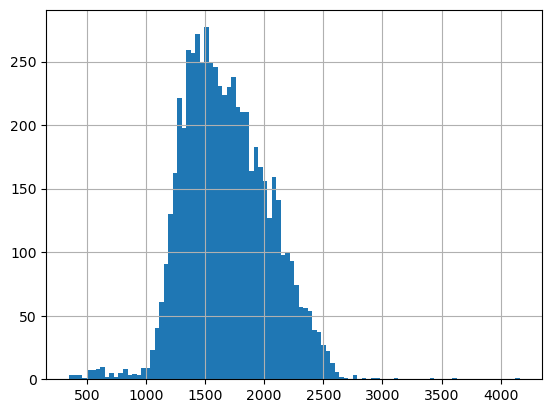

In [34]:
ax = df_muons['ring_size'].hist(bins=100)
#ax.set_xlim(0,200)
#ax.set_yscale("log")

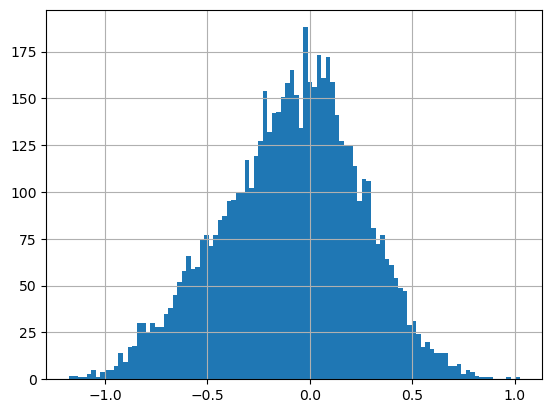

In [37]:
ax = df_muons['radial_skewness'].hist(bins=100)
#ax.set_xlim(0,200)
#ax.set_yscale("log")

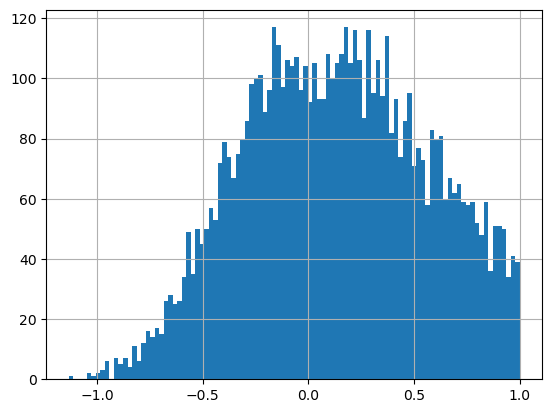

In [51]:
ax = df_muons['radial_excess_kurtosis'].hist(bins=100)

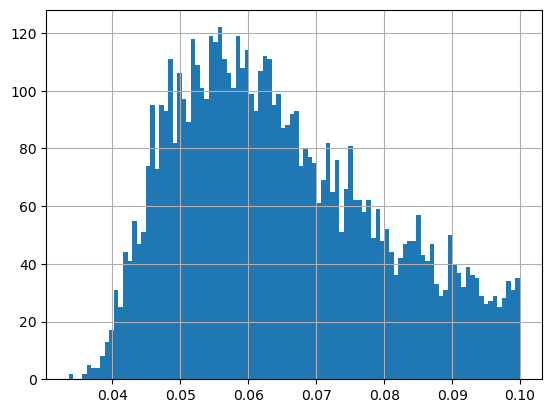

In [38]:
ax = df_muons['radial_stdev'].hist(bins=100)
#ax.set_xlim(0,200)
#ax.set_yscale("log")

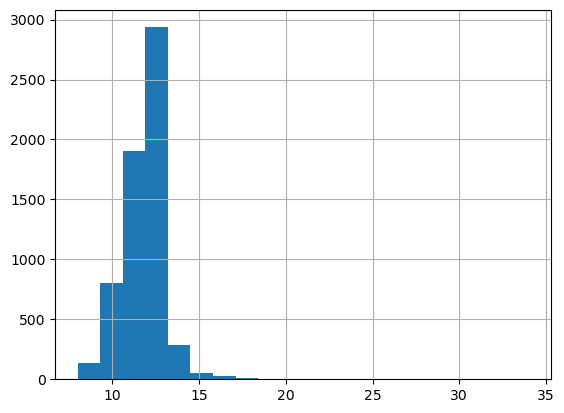

In [40]:
ax = df_muons['hg_peak_sample'].hist(bins=20)
#ax.set_xlim(0,200)
#ax.set_yscale("log")

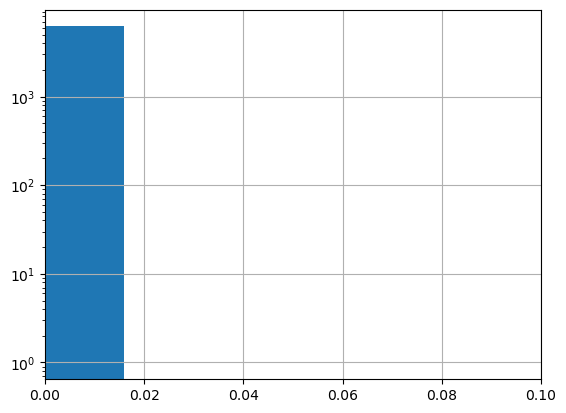

In [47]:
ax = df_muons['lg_peak_sample'].hist(bins=1000)
ax.set_xlim(0,0.1)
ax.set_yscale("log")

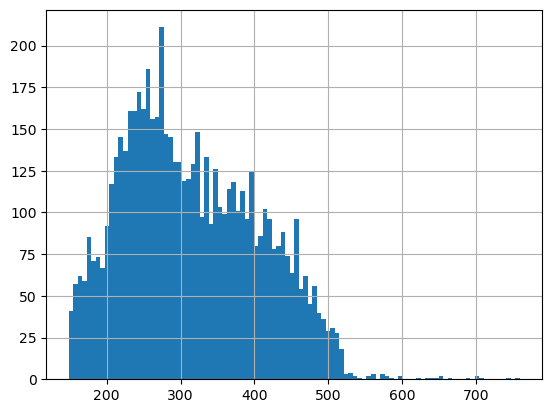

In [50]:
ax = df_muons['num_pixels_in_ring'].hist(bins=100)
#ax.set_xlim(0,0.1)
#ax.set_yscale("log")

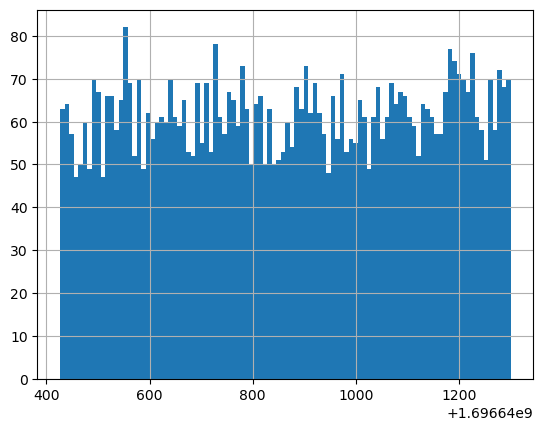

In [54]:
ax = df_muons['event_time'].hist(bins=100)
#ax.set_xlim(0,0.1)
#ax.set_yscale("log")

In [60]:
len(df_muons)/(df_muons['event_time'].values[-1] - df_muons['event_time'].values[0])

7.05179180437434

In [61]:
len(df_muons)

6170

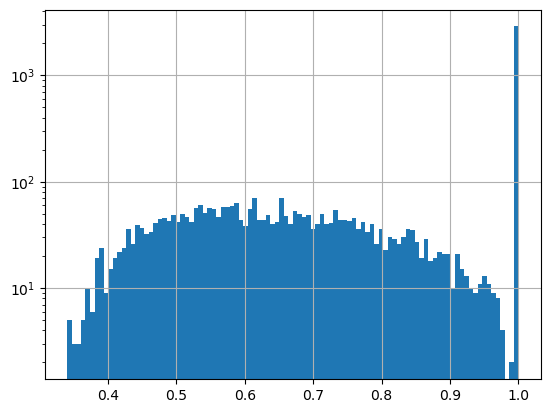

In [64]:
ax = df_muons['ring_containment'].hist(bins=100)
ax.set_yscale("log")

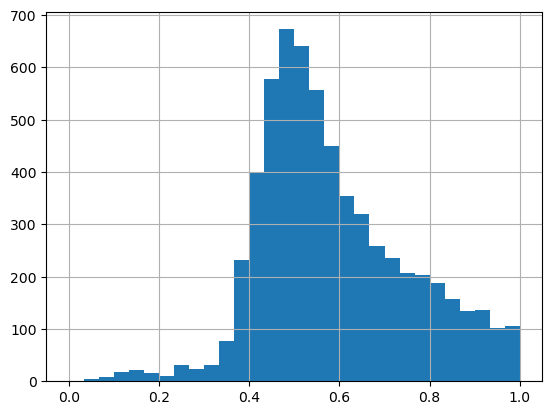

In [67]:
ax = df_muons['ring_completeness'].hist(bins=30)
#ax.set_yscale("log")

In [ ]:
ax = df_muons['de'].hist(bins=100)
ax.set_xlim(-1.0,2)
#ax.set_yscale("log")

## USER INPUT: define below which version(s) of the DL1 files you intend to use in your analysis
Note: if you are not running the notebook in a system where the DL1 files are accessible, just set dl1_dirlist to None in the cell below

In [ ]:
# This is in order of preference. In this case we state that we want to use v0.10, but if it is 
# not available we will use v0.9. Typically one wants to use the latest available version, and 
# default to the previous one if the latest is not available.
dl1_dirlist = ["/fefs/aswg/data/real/DL1/YYYYMMDD/v0.10/tailcut84",
               "/fefs/aswg/data/real/DL1/YYYYMMDD/v0.9/tailcut84"]

# YYYYMMDD of course stands for the night's date (by convention, the date before midnight)

# Uncomment the line below in case you are not running in the IT cluster, and the DL1 files are not available
# anywhere in the system where you are running.
# dl1_dirlist = None

## USER INPUT: path to the necessary datacheck files

In [ ]:
# Note: the sample of night-wise datacheck files from November 2019 to January 2024 is ~3.2 GB 
#
# The standard path for the (v0.10) night-wise datacheck files at the IT cluster is 
# /fefs/aswg/data/real/OSA/DL1DataCheck_LongTerm/v0.10/YYYYMMDD/
#
# Example: load all the 2023 files processed with v0.10:
# files = glob.glob("/fefs/aswg/data/real/OSA/DL1DataCheck_LongTerm/v0.10/2023????/DL1_datacheck_2023*.h5")
# 
# Example: load all the 2023 files processed (with any version - the latest available for each night): 
files = glob.glob("/fefs/aswg/data/real/OSA/DL1DataCheck_LongTerm/night_wise/all/DL1_datacheck_202[1-4]*.h5")

files.sort()

In [ ]:
# This takes a few minutes... DON'T RUN IT MORE THAN ONCE, it is not needed! (If you change the 
# sky region or the cuts just execute the cells from "Data selection configuration" onwards)
dummy = []
dummy2 = []
dummy3 = []

missing_flatfield_tables = 0

for i, file in enumerate(files):
    if i%10 == 0:
        print(i, '/', len(files), file)
    dummy.append(pd.read_hdf(file, 'cosmics_intensity_spectrum'))
    dummy2.append(pd.read_hdf(file, 'runsummary'))
    
    try:
        fftable = pd.read_hdf(file, 'flatfield', errors='ignore')
        dummy3.append(fftable)
    except: 
        # some check files have no flatfield table at all (if calibox was off) 
        missing_flatfield_tables += 1

# cosmics intensity spectra table (subrun-wise):
cis = pd.concat(dummy, ignore_index=True)

# flatfield table (subrun-wise):
flatfield = pd.concat(dummy3, ignore_index=True)

# parameters computed run-wise:
runsummary = pd.concat(dummy2, ignore_index=True)

In [ ]:
cis.columns

In [ ]:
flatfield.columns

In [ ]:
runsummary.columns

In [ ]:
# Obtain list of runnumbers and corresponding dates:
runlist, iix = np.unique(cis['runnumber'], return_index=True)
rundate = cis['yyyymmdd'][iix].to_numpy()

## We will now compute some run-wise quantities from the subrun-wise table entries  

In [ ]:
#
# Lomb-Scargle periodogram of ZD_corrected_cosmics_rate_at_422_pe vs. time
# May eventually be useful to identify runs affected by MAGIC LIDAR shots...
#

max_lsc = []
max_lsc_period = [] # in seconds
for i, ri in enumerate(runlist):
    if i%1000 == 0:
        print(i, '/', len(runlist))
    rvalues = cis['ZD_corrected_cosmics_rate_at_422_pe'][cis['runnumber']==ri].to_numpy()
    tvalues = cis['time'][cis['runnumber']==ri].to_numpy()
    tvalues -= tvalues[0]
    freqs = np.logspace(-3, -1, 100)
    mask = ~np.isnan(rvalues)
    lsc = lombscargle(tvalues[mask], rvalues[mask], freqs, 
                      normalize=True, precenter=True)
    max_lsc.append(np.nanmax(lsc))
    if (~np.isnan(lsc)).sum() == 0:
        max_lsc_period.append(np.nan)
    else:
        max_lsc_period.append(1./freqs[np.nanargmax(lsc)])

max_lsc = np.array(max_lsc)
max_lsc_period = np.array(max_lsc_period)

# You may get some RuntimeWarnings, from rare data with big issues - those warnings can be safely ignored

## ****************   Data selection configuration   ****************
For a standard selection of dark-night data, just set the desired source coordinates, the zenith angle range (if desired), and the time span of the data in YYYYMMDD. All the rest can be kept at the default values.

## USER INPUT: put source coordinates below (if set to None, all data will be used)

In [ ]:
source_coordinates = None

# Source coordinates can be set to specific RA, dec values, or using the source name (if known to astropy):
source_coordinates = SkyCoord.from_name("Crab Nebula")
# source_coordinates = SkyCoord.from_name("Mrk 501")
# source_coordinates = SkyCoord.from_name("BL Lac")

print('Source coordinates:', source_coordinates)

# Select here the desired range of telescope pointings around the source. 
# The values below are for *standard* wobble observations (0.4 deg source offset)
min_angle_to_source = 0.35 * u.deg
max_angle_to_source = 0.45 * u.deg

## USER INPUT: zenith distance range

In [ ]:
# Just an example, use whatever you need
min_zenith = 0 * u.deg
max_zenith = 50 * u.deg

## USER INPUT: range of dates YYYYMMDD (in "date before midnight" convention) 

In [ ]:
# first_date = 0         # no selection
# last_date  = 29990101  # no selection

# Both first_date and last_date are included in the selection:
first_date = 20201101
last_date  = 20231231
# Of course, the input sample of datacheck files must cover the range of dates you are interested in! 


# Very stable period, for reference: 20221118 - 20230214

## USER INPUT: maximum diffuse NSB (average std dev of charge of pedestals, in pixels with no nearby bright star)
Below we are selecting by default "dark conditions" (i.e. not too high NSB like you can have from the moon being above the horizon). Of course, some data are taken in moon conditions, or on a particularly bright sky field, so the value may have to be adapted to the data in question... 

For data taken with **very high** NSB, also the trigger threshold of the LST may be significantly higher, and in that case one may need to relax with the so-called "intensity threshold" cut that you will find a few cells below ("max_intensity_at_half_peak_rate", which is the intensity at which 50% of the dR/dI peak rate is reached). By default it is set to remove runs in which the telescope threshold is too high, but this may be the case for all your data (e.g., for a GRB observed only in moon conditions) and hence you may be forced to remove of relax the cut.

In [ ]:
max_diffuse_nsb_std = 2.3 # p.e. A maximum value of 2.3 roughly corresponds to selecting moon-less data 

## End of user input
For a standard data selection there is no need to modify anything else.

# 

## Require that data contain interleaved and pedestal events

In [ ]:
# Basic selection: select only runs with in which both types of interleaved events are present:
require_interleaved_pedestals = True
require_interleaved_flatfield = True

## Pointing stability (maximum allowed std dev of declination in run)
Besides runs with unstable pointing, this will also remove runs in which tracking got stuck (if not already removed by the source selection above)

In [ ]:
max_pointing_dec_std = 0.01 # deg

## Selection based on the dR/dI, differential cosmics rate (in intensity), i.e. "Cherenkov transparency"
As part of the DL1 data checks, dR/dI was fitted to a power-law between 316-562 p.e. (the funny values are due to the binning used in the DL1 datacheck to store the intensity histograms). The fit parameters were then "converted" to their ZD=0 equivalent, i.e. we apply a zenith-dependent correction so the values for good data are all around the same values.

Then we use the (ZD-corrected) power-law index at 422 p.e., and the (ZD-corrected) vaue of dR/dI (events per second and per p.e.) at 422 p.e. as quantities for the quality selection.

In [ ]:
# We make a fit per subrun. Then we average the fit p-values. For good fits the pdf of P us uniform in [0,1]
# The mean will have mean 0.5 and std dev 1/sqrt(12*Nsubruns). 
# We require a minimum value of (mean_p-0.5)*sqrt(12*Nsubruns) (in the limit of large Nsubruns would be a standard
# gaussian of mean 0 and std dev 1)

min_mean_fit_p = -3.

# Lomb Scargle periodogram, to detect strange features in the dR/dI evolution within a run
max_LS_periodogram_maxamplitude = 1e-2

min_drdi_index = -2.35
max_drdi_index = -2.1

min_drdi_at_422pe = 1.5
# We do not set a maximum for the rate, we expect all bad observation (or telescope) conditions 
# to result in lower-than-optimal rates

# Minimum fraction of subruns around the mode of drdi_at_422pe (within +/-0.075) - see the find_mode 
# function below
min_fraction_around_mode = 0.8

# Maximum intensity threshold
# This is a proxy for energy threshold (for a given zenith). the cut is not tight, because
# even data with high threshold may be of very good quality, and valid to obtain a spectrum.
# If one is targeting very low energies (e.g. for pulsar analysis) then it may be necessary to 
# make a stricter selection.
max_intensity_at_half_peak_rate = 70 # p.e.

# Note: The cut in intensity applied in the analyis of low-threshold (<40) data is >50 p.e. 
# The cut should be higher (to prevent biases in flux calculations) for data with higher threshold.
# Difficult to set a general rule, but it is safer to put the cut above the peak of the cosmics 
# intensisy spectrum

## ********* End of Configuration ************
##



In [ ]:
print('Total number of loaded subruns:', len(cis))
print('Total number of loaded runs:', len(np.unique(cis['runnumber'])))

In [ ]:
# Remove runs in summary table which are not present in the cis table, to keep consistency between them.
# NOTE, AM 20231117: as of now only run 8091 is missing from the cis table, because 
# its original run-wise datacheck file is faulty (possibly due to some problem at run time)

for r in runsummary['runnumber']:
    if r in runlist:
        continue
    print('Removing run', r, 'from runsummary table!')
    runsummary.drop(np.where(runsummary['runnumber']==r)[0], inplace=True)
    runsummary.reset_index(inplace=True, drop=True)

In [ ]:
# Check that now the runsummary entries match the runs in runlist (in the same order)
assert(np.allclose(runlist, runsummary['runnumber']))

In [ ]:
# Some utility functions:
#
# Function to find the mode (most frequent value) of an array x, using a bin width bw 
# and step dx (default=bw/100) (it is a sliding window sum)
#
# If return_fraction==True, then the fraction of the array's elements
# contained in the bw-wide window around the mode is returned (instead of the 
# mode)
#
def find_mode(x, bw=0.15, dx=None, return_fraction=False):
    
    min = np.nanmin(x)
    max = np.nanmax(x)
    
    if np.isnan(min):
        return np.nan
    if (max == min):
        return np.nan
    
    if return_fraction & (max - min < bw):
        return 1. # All values are within bw
    
    # If ALL data are within bw, then it does not make sense to make 
    # a sliding window. We reduce the window to one half until it becomes 
    # smaller than the range of x:

    while bw > (max - min):
        bw *= 0.5

    if dx is None:
        dx = bw / 100
    
    nn = int((max - min) // dx + 2)
    cts, edges = np.histogram(x[~np.isnan(x)], bins=nn, range=(min-dx, max+dx))
    csum = np.cumsum(cts) / np.sum(cts)
    nsumbins = int(bw//dx)
    running_sum = csum[nsumbins:]-csum[:-nsumbins]
    xvalues = 0.5*(edges[nsumbins:]+edges[:-nsumbins])[:-1]

    max_running_sum = np.nanmax(running_sum)
    if np.isnan(max_running_sum):
        return np.nan
    
    if return_fraction:
        return max_running_sum

    return xvalues[np.nanargmax(running_sum)]

def find_fraction_in_mode(x):
    return find_mode(x, bw=0.15, dx=None, return_fraction=True)

def find_intensity_mode(x):
    return find_mode(x, bw=40) # 40 photoelectrons sliding-window

# Average RA, asumed to be in degrees
def ra_mean(ra):
    cosra = np.cos(ra*u.deg)
    sinra = np.sin(ra*u.deg)

    meanra = np.arctan2(sinra.mean(), cosra.mean())
    if meanra < 0:
        meanra += 2*np.pi*u.rad

    return meanra.to_value(u.deg)

In [ ]:
run_span = cis['runnumber'].max() - cis['runnumber'].min() + 1
runmin = cis['runnumber'].min() - 0.5
runmax = cis['runnumber'].max() + 0.5

## Compute more run-wise quantities, needed to apply the data selection cuts:

In [ ]:
nonan = ~np.isnan(cis['ZD_corrected_cosmics_rate_at_422_pe'])
mean_R422, bin_edges, _ = binned_statistic(cis['runnumber'][nonan], 
                                           cis['ZD_corrected_cosmics_rate_at_422_pe'][nonan], 
                                           statistic='mean', bins=run_span, range=(runmin, runmax))
std_R422, _, _ = binned_statistic(cis['runnumber'][nonan], 
                                  cis['ZD_corrected_cosmics_rate_at_422_pe'][nonan], 
                                  statistic='std', bins=bin_edges)
mode_R422, _, _ = binned_statistic(cis['runnumber'][nonan], 
                                   cis['ZD_corrected_cosmics_rate_at_422_pe'][nonan], 
                                   statistic=find_mode, bins=bin_edges)
fraction_around_mode_R422, _, _ = binned_statistic(cis['runnumber'][nonan], 
                                                   cis['ZD_corrected_cosmics_rate_at_422_pe'][nonan], 
                                                   statistic=find_fraction_in_mode, bins=bin_edges)


nonan = (cis['intensity_at_reference_rate'] < 1000) # this rempoves nans but also rare rogue values
mean_intensity_at_reference_rate, _, _ =  binned_statistic(cis['runnumber'][nonan], 
                                                           cis['intensity_at_reference_rate'][nonan], 
                                                           statistic='mean', bins=bin_edges)
std_intensity_at_reference_rate, _, _ =  binned_statistic(cis['runnumber'][nonan], 
                                                          cis['intensity_at_reference_rate'][nonan], 
                                                          statistic='std', bins=bin_edges)

mean_light_yield, _, _ = binned_statistic(cis['runnumber'][nonan], 
                                          cis['light_yield'][nonan], 
                                          statistic='mean', bins=run_span, range=(runmin, runmax))
std_light_yield, _, _ = binned_statistic(cis['runnumber'][nonan], 
                                         cis['light_yield'][nonan], 
                                         statistic='std', bins=run_span, range=(runmin, runmax))

nonan = ~np.isnan(cis['ZD_corrected_cosmics_spectral_index'])
mean_index, _, _ = binned_statistic(cis['runnumber'][nonan], 
                                    cis['ZD_corrected_cosmics_spectral_index'][nonan], 
                                           statistic='mean', bins=run_span, range=(runmin, runmax))
std_index, _, _ = binned_statistic(cis['runnumber'][nonan], 
                                   cis['ZD_corrected_cosmics_spectral_index'][nonan], 
                                           statistic='std', bins=run_span, range=(runmin, runmax))



# Note: the P-value of the (subrun-wise) power-law fits to the intensity spectra is properly distributed 
# (uniform from 0 to 1) for practically all subruns. Note that the run-averaged P-value no longer has a 
# uniform distribution! For good runs it is a gaussuan-ish distribution around 0.5 (central limit theorem!)
mean_fit_p_value, _, _ =  binned_statistic(cis['runnumber'][nonan], 
                                           cis['intensity_spectrum_fit_p_value'][nonan], 
                                           statistic='mean', bins=bin_edges)

nonan = ~np.isnan(cis['ZD_corrected_intensity_at_half_peak_rate'])
mean_intensity_threshold, _, _ =  binned_statistic(cis['runnumber'][nonan], 
                                                   cis['ZD_corrected_intensity_at_half_peak_rate'][nonan], 
                                                   statistic='mean', bins=bin_edges)
std_intensity_threshold, _, _ =  binned_statistic(cis['runnumber'][nonan], 
                                                  cis['ZD_corrected_intensity_at_half_peak_rate'][nonan], 
                                                  statistic='std', bins=bin_edges)

nonan = ~np.isnan(cis['intensity_at_peak_rate'])
# NOTE: THE INTENSITIES AT PEAK RATE ARE NOT ZD-CORRECTED! THIS IS BECAUSE WE DO NOT USE IT FOR THE 
# QUALITY SELECTION, BUT ONLY TO ESTIMATE WHAT INTENSITY CUT MAY BE REASONABLE TO USE IN LATER ANALYSIS!
mean_intensity_at_peak_rate, _, _ =  binned_statistic(cis['runnumber'][nonan], 
                                                      cis['intensity_at_peak_rate'][nonan], 
                                                      statistic='mean', bins=bin_edges)
std_intensity_at_peak_rate, _, _ =  binned_statistic(cis['runnumber'][nonan], 
                                                  cis['intensity_at_peak_rate'][nonan], 
                                                  statistic='std', bins=bin_edges)



mean_ra, _, _  = binned_statistic(cis['runnumber'], cis['ra_tel'], statistic=ra_mean, bins=bin_edges)
mean_dec, _, _ = binned_statistic(cis['runnumber'], cis['dec_tel'], statistic='mean', bins=bin_edges)
std_dec, _, _ = binned_statistic(cis['runnumber'], cis['dec_tel'], statistic='std', bins=bin_edges)
# We do not compute std_ra - it is not totally straightforward because of 0=360 deg...

mean_coszd, _, _ = binned_statistic(cis['runnumber'], cis['cos_zenith'], statistic=ra_mean, bins=bin_edges)

nonan = ~np.isnan(cis['diffuse_nsb_std'])
mean_diffuse_nsb_std, _ , _ = binned_statistic(cis['runnumber'][nonan], 
                                               cis['diffuse_nsb_std'][nonan], 
                                               statistic='mean', bins=bin_edges)


nsubruns, _ = np.histogram(cis['runnumber'], bins=bin_edges)
run_exists = nsubruns>0

# NOTE: some "All-NaN slice warnings may appear, because of (rare) really bad data"

In [ ]:
# Development NOTE, AM, TBF?
#
# Applying cuts in mean values through a run (of subrun-wise-computed quantities) somehow "favours" long runs. 
# The spread of the mean values will decrease as 1/sqrt(N_subruns), so all other thing being equal,
# a short run has a smaller chance of surviving cuts. Anyway, short runs are often short because of various 
# issues, so probably this is not a big deal!
#

In [ ]:
# Just to make sure the same number of subruns are present 
assert((nsubruns>0).sum() == max_lsc.size)

In [ ]:
# Remove "empty entries" (i.e. removes run numbers which are not in loaded sample,
# e.g. because do not correspond to sky runs)

mean_R422 = mean_R422[run_exists]
std_R422  = std_R422[run_exists]
mode_R422 = mode_R422[run_exists]
mean_intensity_at_reference_rate = mean_intensity_at_reference_rate[run_exists]
std_intensity_at_reference_rate = std_intensity_at_reference_rate[run_exists]
fraction_around_mode_R422 = fraction_around_mode_R422[run_exists]
mean_light_yield = mean_light_yield[run_exists]
std_light_yield = std_light_yield[run_exists]
mean_index = mean_index[run_exists]
std_index = std_index[run_exists]
mean_intensity_threshold = mean_intensity_threshold[run_exists]
std_intensity_threshold = std_intensity_threshold[run_exists]
mean_intensity_at_peak_rate = mean_intensity_at_peak_rate[run_exists]
std_intensity_at_peak_rate = std_intensity_at_peak_rate[run_exists]
mean_ra = mean_ra[run_exists]
mean_dec = mean_dec[run_exists]
std_dec = std_dec[run_exists]
mean_coszd = mean_coszd[run_exists]
mean_diffuse_nsb_std = mean_diffuse_nsb_std[run_exists]
mean_fit_p_value = mean_fit_p_value[run_exists]
nsubruns = nsubruns[run_exists]

In [ ]:
# Define here all the selection masks using the values set by the user above.

interleaved_ok_selection = np.array(runlist.size*[True]) 

if require_interleaved_flatfield:
    interleaved_ok_selection &= (runsummary['num_flatfield'] > 0).to_numpy()
if require_interleaved_pedestals:
    interleaved_ok_selection &= (runsummary['num_pedestals'] > 0).to_numpy()
# interleaved_ok means just that some events were identified as interleaved FF and pedestal!
    
telescope_pointing = SkyCoord(ra=mean_ra*u.deg, dec=mean_dec*u.deg)

skyregion_selection = np.array(runlist.size*[True]) # All Sky, if no source selection
if source_coordinates != None:
    angular_distance = source_coordinates.separation(telescope_pointing)
    skyregion_selection = (angular_distance > min_angle_to_source) & (angular_distance < max_angle_to_source)

pointing_stability_selection = std_dec < max_pointing_dec_std # Stable pointing
    
maxcoszd = np.cos(min_zenith)
mincoszd = np.cos(max_zenith)
# Note that the zenith limit is done with the run's mean, so there will be some events beyond the limits:
zd_selection = (mean_coszd > mincoszd) & (mean_coszd < maxcoszd)

nsb_selection = mean_diffuse_nsb_std < max_diffuse_nsb_std

date_selection = (rundate >= first_date) & (rundate <= last_date)

# P-value for good fits is distributed uniformly between 0 and 1 (which has std dev = 1/sqrt(12)). 
# So the mean of N such quantities is distributed (for N large) approximately as a a gaussian of 
# mean 0.5 and std dev = 1/sqrt(12*N). The cut below removes runs for which the power-law fits of
# the cosmic rays intensity spectra, dR/dI, are (in average) poor:
p_value_selection = (mean_fit_p_value-0.5)*(12*nsubruns)**0.5 > min_mean_fit_p

LS_periodogram_selection = max_lsc < max_LS_periodogram_maxamplitude

drdi_index_selection = (mean_index > min_drdi_index) & (mean_index < max_drdi_index) 

# the dR/dI rate selection includes a condition on its stability during the run. We require a 
# minimum fraction "min_fraction_around_mode" (defined above) of the subruns to be within +/- 0.075 of 
# the mode. This is to identify runs with large variations (sometimes due to spurious sources of triggers,
# like e.g. car flashes or the MAGIC LIDAR)
drdi_rate_selection = (mean_R422 > min_drdi_at_422pe) & (fraction_around_mode_R422 > min_fraction_around_mode)

intensity_threshold_selection = mean_intensity_threshold < max_intensity_at_half_peak_rate

In [ ]:
fig = plt.figure(figsize=(10, 15))


fig.add_subplot(5, 2, 1)
# Pointing stability
cc, bb, _ = plt.hist(std_dec, bins=250, range=(0,0.05), label='All data',
                    log=True, color='lightgrey', density=True)
plt.hist(std_dec[interleaved_ok_selection & skyregion_selection & date_selection], bins=bb,
         label='Runs for selected\n source & dates',
         log=True, density=True, histtype='step')

plt.plot([max_pointing_dec_std, max_pointing_dec_std], [0, cc.max()], '--', label='Maximum allowed', 
         color='red')
plt.xlabel('Declination std dev within run (degrees)')
plt.ylabel('number of runs (normalized)')
plt.legend()


fig.add_subplot(5, 2, 2)
cc, bb, _ = plt.hist(np.rad2deg(np.arccos(mean_coszd)), bins=180, range=(0,90), label='All data',
                     color='lightgrey', density=True)

plt.hist(np.rad2deg(np.arccos(mean_coszd))[interleaved_ok_selection & skyregion_selection & date_selection], 
         bins=bb, label='Runs for selected\n source & dates',
         density=True, histtype='step')

plt.plot([max_zenith.to_value(u.deg), max_zenith.to_value(u.deg)], 
         [0, cc.max()], '--', label='Maximum allowed', color='red')
plt.plot([min_zenith.to_value(u.deg), min_zenith.to_value(u.deg)], 
         [0, cc.max()], '--', label='Minimum allowed', color='green')

plt.xlabel('Zenith angle (degrees)')
plt.ylabel('number of runs (normalized)')
plt.legend()


fig.add_subplot(5, 2, 3)
cc, bb, _ = plt.hist(mean_diffuse_nsb_std, bins=200, range=(0,10), label='All data',
                     color='lightgrey', density=True)

plt.hist(mean_diffuse_nsb_std[interleaved_ok_selection & skyregion_selection & date_selection], bins=bb,
         label='Runs for selected\n source & dates',
         density=True, histtype='step')

plt.plot([max_diffuse_nsb_std, max_diffuse_nsb_std], 
         [0, cc.max()], '--', label='Maximum allowed', color='red')
plt.xlabel('Diffuse NSB std dev (p.e.)')
plt.ylabel('number of runs (normalized)')
plt.legend()

fig.add_subplot(5, 2, 4)
cc, bb, _ = plt.hist((mean_fit_p_value-0.5)*(12*nsubruns)**0.5, 
                     bins=150, range=(-6,9), label='All data',
                     color='lightgrey', density=True)
plt.hist(((mean_fit_p_value-0.5)*(12*nsubruns)**0.5)[interleaved_ok_selection & 
                                                     skyregion_selection & date_selection], 
         bins=bb, label='Runs for selected\n source & dates',
         density=True, histtype='step')
plt.plot([min_mean_fit_p, min_mean_fit_p], 
         [0, cc.max()], '--', label='Minimum allowed', color='green')
plt.xlabel('(mean_dR/dI_fit_P_value-0.5)/sqrt(12*nsubruns)')
plt.ylabel('number of runs (normalized)')
plt.legend()


fig.add_subplot(5, 2, 5)
cc, bb, _ = plt.hist(mean_R422, bins=200, range=(0,5), label='All data',
                     color='lightgrey', density=True)

plt.hist(mean_R422[interleaved_ok_selection & skyregion_selection & date_selection], bins=bb,
         label='Runs for selected\n source & dates',
         density=True, histtype='step')

plt.plot([min_drdi_at_422pe, min_drdi_at_422pe], 
         [0, cc.max()], '--', label='Minimum allowed', color='green')
plt.xlabel('dR/dI cosmics rate at 422 p.e. (evts/s/p.e.)')
plt.ylabel('number of runs (normalized)')
plt.legend()


fig.add_subplot(5, 2, 6)
cc, bb, _ = plt.hist(fraction_around_mode_R422, bins=200, range=(0,1), 
                     label='All data', color='lightgrey', density=True)
plt.hist(fraction_around_mode_R422[interleaved_ok_selection & skyregion_selection & date_selection], bins=bb,
         label='Runs for selected\n source & dates', density=True, histtype='step')

plt.plot([min_fraction_around_mode, min_fraction_around_mode],
         [0, cc.max()], '--', label='Minimum allowed', color='green')
plt.xlabel('Fraction of dR/dI values around the mode for the run')
plt.ylabel('number of runs (normalized)')
plt.legend()



fig.add_subplot(5, 2, 7)
cc, bb, _ = plt.hist(mean_index, bins=200, range=(-3,0), label='All data',
                     color='lightgrey', density=True)

plt.hist(mean_index[interleaved_ok_selection & skyregion_selection & date_selection], bins=bb,
         label='Runs for selected\n source & dates',
         density=True, histtype='step')

plt.plot([min_drdi_index, min_drdi_index], 
         [0, cc.max()], '--', label='Minimum allowed', color='green')
plt.plot([max_drdi_index, max_drdi_index], 
         [0, cc.max()], '--', label='Maximum allowed', color='red')
plt.xlabel('dR/dI cosmics rate power index at 422 p.e.')
plt.ylabel('number of runs (normalized)')
plt.legend()


fig.add_subplot(5, 2, 8)
cc, bb, _ = plt.hist(np.log10(max_lsc), bins=100, range=(-6,0), label='All data',
                     color='lightgrey', density=True)
plt.hist(np.log10(max_lsc)[interleaved_ok_selection & skyregion_selection & date_selection], bins=bb,
         label='Runs for selected\n source & dates',
         density=True, histtype='step')
plt.plot([np.log10(max_LS_periodogram_maxamplitude), 
          np.log10(max_LS_periodogram_maxamplitude)], 
         [0, cc.max()], '--', label='Maximum allowed', color='red')
plt.xlabel('Log10(max amplitude in LS periodogram)')
plt.ylabel('number of runs (normalized)')
plt.legend()

fig.add_subplot(5, 2, 9)
cc, _, _ = plt.hist(mean_intensity_threshold, 
                    bins=200, range=(0,200), label='All data',
                    density=True, color='lightgrey')

cc, _, _ = plt.hist(mean_intensity_threshold[interleaved_ok_selection & skyregion_selection & date_selection], 
                    bins=200, range=(0,200), label='Runs for selected\n source & dates',
                    density=True, histtype='step')
plt.plot([max_intensity_at_half_peak_rate, max_intensity_at_half_peak_rate],
         [0, cc.max()], '--', label='Maximum allowed', color='red')

plt.grid()
plt.xlabel('Intensity at 50% of dR/dI peak rate (mean during run) (p.e.)')
plt.ylabel('number of runs (normalized)')
plt.legend()

fig.add_subplot(5, 2, 10)
cc, _, _ = plt.hist(mean_intensity_at_peak_rate, 
                    bins=200, range=(0,200), label='All data', 
                    density=True, color='lightgrey')

cc, _, _ = plt.hist(mean_intensity_at_peak_rate[interleaved_ok_selection & skyregion_selection & date_selection], 
                    bins=200, range=(0,200), label='Runs for selected\n source & dates', # log=True, 
                    density=True, histtype='step')
plt.grid()
plt.xlabel('Intensity at dR/dI peak rate (mean during run) (p.e.)')
plt.ylabel('number of runs (normalized)')
plt.legend()

print()
print('The dR/dI spectrum parameters below are corrected (for each subrun) to their ZD=0 equivalent')
print('except the intensity at the dR/dI peak rate')
plt.tight_layout()
plt.show()

### In the last row of plots above we show the distribution of the (ZD-corrected) "intensity threshold", defined as the position of the rising edge (50% of peak) of the cosmic ray intensity spectrum, and the distribution of the intensity at which the peak is located (the latter is **not** corrected for zenith)

Note that the data may be perfectly healthy even when they have a higher threshold than usual. But it is dangerous (systematic-errors-wise) to use events with intensities well below the peak, because of MC-data discrepancies (standard MC is produced such that it resembles "optimal data" in terms of threshold).

The event-wise cut in intensity that we apply in the higher-level analyis of the low-threshold data (with say, intensity at 50% of peak rate <40 p.e.) is intensity>50 p.e. The cut should be higher (to prevent biases in flux calculations) for data with higher threshold.



## Print some run selection statistics

In [ ]:
print('\nNumber of runs (% is w.r.t. those in Sky region & zenith range):\n')
starting_nruns = (date_selection & skyregion_selection).sum()
print('    In the requested Sky region and range of dates:\t', starting_nruns)

nruns_within_zdrange = (date_selection & skyregion_selection & zd_selection).sum()
print('  + zenith in requested range:\t\t\t\t', nruns_within_zdrange)

nruns_nsb_ok = (date_selection & skyregion_selection & zd_selection &
                nsb_selection).sum()
print('  + NSB in requested range:\t\t\t\t', nruns_nsb_ok,
      f'({nruns_nsb_ok/nruns_within_zdrange*100:.1f}%)\n')


nruns_interleaved_ok = (date_selection & skyregion_selection & zd_selection &
                        nsb_selection & interleaved_ok_selection).sum()
print('  + FF and pedestal interleaved events are present:\t', nruns_interleaved_ok,
      f'({nruns_interleaved_ok/nruns_within_zdrange*100:.1f}%)')

nruns_stable_pointing = (date_selection & skyregion_selection & zd_selection &
                         nsb_selection & interleaved_ok_selection & 
                         pointing_stability_selection).sum()
print('  + Stable pointing:\t\t\t\t\t', nruns_stable_pointing,
      f'({nruns_stable_pointing/nruns_within_zdrange*100:.1f}%)')

nruns_fit_p_value_ok = (date_selection & skyregion_selection & zd_selection &
                        nsb_selection & interleaved_ok_selection & 
                        pointing_stability_selection &
                        p_value_selection).sum()
print('  + dR/dI fit P-value ok:\t\t\t\t', nruns_fit_p_value_ok,
      f'({nruns_fit_p_value_ok/nruns_within_zdrange*100:.1f}%)')

nruns_LS_periodogram_ok = (date_selection & skyregion_selection & zd_selection &
                           nsb_selection & interleaved_ok_selection & 
                           pointing_stability_selection &
                           p_value_selection & LS_periodogram_selection).sum()
print('  + dR/dI LS periodogram ok:\t\t\t\t', nruns_LS_periodogram_ok,
      f'({nruns_LS_periodogram_ok/nruns_within_zdrange*100:.1f}%)')

nruns_drdi_index_ok = (date_selection & skyregion_selection & zd_selection &
                       nsb_selection & interleaved_ok_selection & 
                       pointing_stability_selection & 
                       p_value_selection & LS_periodogram_selection &
                       drdi_index_selection).sum()
print('  + dR/dI index ok:\t\t\t\t\t', nruns_drdi_index_ok,
      f'({nruns_drdi_index_ok/nruns_within_zdrange*100:.1f}%)')

nruns_drdi_rate_ok = (date_selection & skyregion_selection & zd_selection &
                      nsb_selection & interleaved_ok_selection & 
                      pointing_stability_selection & 
                      p_value_selection & LS_periodogram_selection &
                      drdi_index_selection & drdi_rate_selection).sum()

print('  + dR/dI rate ok:\t\t\t\t\t', nruns_drdi_rate_ok,
      f'({nruns_drdi_rate_ok/nruns_within_zdrange*100:.1f}%)')

nruns_threshold_ok = (date_selection & skyregion_selection & zd_selection &
                      nsb_selection & interleaved_ok_selection & 
                      pointing_stability_selection & 
                      p_value_selection & LS_periodogram_selection &
                      drdi_index_selection & drdi_rate_selection &
                      intensity_threshold_selection).sum()

print('  + intensity threshold ok:\t\t\t\t', nruns_threshold_ok,
      f'({nruns_threshold_ok/nruns_within_zdrange*100:.1f}%)')

print('\nNote: about 64% of all *dark-night* observations within ZD<80 deg fulfill all quality cuts.')
print('(in the stable, good-quality period 20221118 - 20230214, 92% of *dark-night* observations within ZD<80 deg do).')

In [ ]:
# All selections but the dR/dI rate cuts:
mask_no_drdi_rate_cut = (date_selection & 
                         skyregion_selection & 
                         zd_selection & 
                         nsb_selection &
                         interleaved_ok_selection & 
                         pointing_stability_selection & 
                         p_value_selection &
                         LS_periodogram_selection &
                         drdi_index_selection &
                         intensity_threshold_selection)

In [ ]:
mask = mask_no_drdi_rate_cut & drdi_rate_selection

good_runs = runlist[mask]

print('Selected:', mask.sum(), 'of', runlist.size, 'runs')

obs_hours = runsummary['elapsed_time'][mask].sum()/3600

print(f'Total observation time: {obs_hours:.2f} h')

In [ ]:
# Build a mask of selected data which works for the subrun-wise table:
subrun_mask = np.array([True if x in good_runs else False for x in cis['runnumber']])

### Now we obtain, from the (run-wise) diffuse NSB std values, the median, and identify a few "typical" subruns that we can then use to find (using the script lstchain_tune_nsb) the parameters needed to tune the MC (in the DL1ab step) for later analysis

Note that the NSB tuning (also called "noise padding") of the MC at the DL1ab analysis step (which starts with already integrated waveforms for each pixel, using a peak-search algorithm) will not work for an NSB level much higher than the one in the MC. The reason is that in such a case the peak search algorithm would often pick a random NSB fluctuation instead of the actual Cherenkov pulse, hence just adding noise to the original integrated value is not a proper way to reproduce the effect in the data.

As a rule of thumb:
* if the median NSB standard deviation in the sample (reported below) **below 1.6 p.e.** you can use the **standard MC** without tuning.
* if it is **between 1.6 and 4 p.e.**, you can use the simple NSB tuning approach of the MC at the DL1ab level (see documentation of the script **lstchain_tune_nsb**)
* for values **above 4 p.e.** it is better to tune the MC at the R0 to DL1 step, by adding random noise to the waveforms (i.e. before pulse integration). This has to be done using the **"waveform_nsb_tuning"** option in the lstchain*.json configuration file when running the R0 to DL1 step for the MC. See the script **lstchain_tune_nsb_waveform**. 

In [ ]:
nsb_median = np.median(mean_diffuse_nsb_std[mask])

print(f'\nMedian of the NSB standard deviation for the sample: {nsb_median:.3f} p.e.')
if nsb_median < 1.6:
    print('This sample can probable be analyzed properly using the standard Monte Carlo.')
elif nsb_median < 4:
    print('It is recommended to use NSB-tuned MC (using lstchain_tune_nsb and lstchain_dl1ab) for analyzing this sample.')
else:
    print('It is recommended to use MC with matching NSB (using the waveform_nsb_tuning option in the MC R0 to DL1 step).')

print('\nSubruns with NSB std dev closest to sample median:\n')

dnsb = cis['diffuse_nsb_std'].to_numpy()
nonan = np.isfinite(dnsb)
eltime = cis['elapsed_time'].to_numpy() 
goodtime = eltime > np.nanmedian(eltime) # Just to avoid too short subruns (e.g. at the endf of a run)

argsrt = np.argsort(np.abs(dnsb[subrun_mask & nonan & goodtime] - nsb_median))

for iarg in argsrt[:5]:
    ymd = cis['yyyymmdd'][subrun_mask & nonan & goodtime].to_numpy()[iarg]
    rn = cis['runnumber'][subrun_mask & nonan & goodtime].to_numpy()[iarg]
    srn = cis['subrun'][subrun_mask & nonan & goodtime].to_numpy()[iarg]
    print(f'{ymd}   Run{rn:05d}.{srn:04d}   NSB std dev: {dnsb[subrun_mask & nonan & goodtime][iarg]:.3f} p.e.')

## Plot the evolution of dR/dI and the "light yield"

In [ ]:
plt.figure(figsize=(12, 3.5))
plt.scatter(runlist, mean_R422, s=2, color='lightgrey', label='All data')
plt.scatter(runlist[mask], mean_R422[mask], s=2, label='Selected runs')

plt.scatter(runlist[(~mask) & mask_no_drdi_rate_cut], mean_R422[(~mask) & mask_no_drdi_rate_cut], s=2, 
            label='Runs which failed dR/dI rate selection')

plt.xlabel('Run number')
plt.ylabel('dR/dI cosmics rate at 422 p.e. (evts/s/p.e.)')
plt.ylim(0, 4.5)
plt.legend()
plt.grid()
plt.show()

In [ ]:
#
# If you need to produce a plot vs. the actual date, and not run number, here is an example:
# (Uncomment code below to test)
#

# runtime = np.array([runsummary['time'][runsummary['runnumber']==rr].array[0] for rr in runlist])

# from datetime import datetime
# utctime = [datetime.utcfromtimestamp(x) for x in runtime]
# plt.figure(figsize=(12, 3.5))
# plt.scatter(utctime, mean_R422, s=2, color='lightgrey', label='All data')

# utctime = [datetime.utcfromtimestamp(x) for x in runtime[mask]]
# plt.scatter(utctime, mean_R422[mask], s=2, label='Selected runs')


# utctime = [datetime.utcfromtimestamp(x) for x in runtime[(~mask) & mask_no_drdi_rate_cut]]
# plt.scatter(utctime, mean_R422[(~mask) & mask_no_drdi_rate_cut], s=2, 
#             label='Runs which failed dR/dI rate selection')

# plt.ylabel('dR/dI cosmics rate at 422 p.e. (evts/s/p.e.)')
# plt.ylim(0, 4.5)
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
plt.figure(figsize=(12, 3.5))
plt.scatter(runlist, mean_light_yield, s=2, color='lightgrey', label='All data')
plt.scatter(runlist[mask], mean_light_yield[mask], s=2, label='Selected runs')

plt.scatter(runlist[(~mask) & mask_no_drdi_rate_cut], mean_light_yield[(~mask) & mask_no_drdi_rate_cut], s=2, 
            label='Runs which failed dR/dI rate selection')

plt.xlabel('Run number')
plt.ylabel('Relative light yield')
plt.ylim(0, 2)
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Show for (at most) 10 of the selected spectra the evolution of dR/dI through the run:
step = 1
if mask.sum() > 10:
    step = int(mask.sum()//10)

for jj in runlist[mask][::step]:
    plt.figure(figsize=(12, 3))
    print('Run:', jj) 
    print(f'    Run-averaged dR/dI @ 422 p.e. = {mean_R422[runlist==jj][0]:.3f}')
    print(f'    Fraction of subruns around dR/dI mode = {fraction_around_mode_R422[runlist==jj][0]:.3f}'
          f' (minimum allowed: {min_fraction_around_mode})')
    print(f'    max_lsc: {max_lsc[runlist==jj][0]:.2e}')

    xt = cis['time'][cis['runnumber']==jj] - cis['time'][cis['runnumber']==jj].min()
    plt.plot(xt,
             cis['ZD_corrected_cosmics_rate_at_422_pe'][cis['runnumber']==jj], 
             label='dR/dI @ 422 p.e.')

    plt.plot([xt.min(), xt.max()], [min_drdi_at_422pe, min_drdi_at_422pe], linestyle='--', 
             linewidth=1, color='tab:blue', label='Minimum allowed run average')
    
    plt.plot(xt,
             -cis['ZD_corrected_cosmics_spectral_index'][cis['runnumber']==jj], 
             label='dR/dI abs(PL index) @ 422 p.e.')

#     plt.scatter(xt,
#                 cis['intensity_spectrum_fit_p_value'][cis['runnumber']==jj], 
#                 label='Fit P-value', color='tab:orange')
    plt.grid()

    plt.ylim(0, 3)
    plt.xlabel('time (s)')
    plt.legend()
    plt.show()
    print()


In [ ]:
plt.figure(figsize=(12, 3))

# count number of dR/dI-wise "anomalous" subruns in selected sample:
drdi_high = 2
too_high = 0
drdi_low = 1.4
too_low = 0
total_nsubruns = 0

for jj in runlist[mask]:
    xt = cis['time'][cis['runnumber']==jj] - cis['time'][cis['runnumber']==jj].min()
    plt.plot(xt,
             cis['ZD_corrected_cosmics_rate_at_422_pe'][cis['runnumber']==jj])
    too_high += (cis['ZD_corrected_cosmics_rate_at_422_pe'][cis['runnumber']==jj] > drdi_high).sum()
    too_low  += (cis['ZD_corrected_cosmics_rate_at_422_pe'][cis['runnumber']==jj] < drdi_low).sum()
    total_nsubruns += (cis['runnumber']==jj).sum()

plt.ylim(0, 3)
#plt.xlim(0,1200)
plt.xlabel('time (s)')
plt.ylabel('dR/dI at 422 p.e.')
plt.grid()
plt.show()

print('Total number of subruns in selected sample:', total_nsubruns)
print('Do not panic about the ugly-looking spikes, they are rare:')
print(too_high, f'subruns ({100*too_high/total_nsubruns:.3f}%)',' have dR/dI @ 422 larger than', drdi_high)
print(too_low,  f'subruns ({100*too_low/total_nsubruns:.3f}%)', ' have dR/dI @ 422 smaller than', drdi_low)


## Now we test the stability of the dR/dI - related parameters
Note that the gaussian fits attempted below on the selected data (both for the dR/dI values, the corresponding intensities at a reference rate, and the derived "light yield") are not necessarily good. Even after the selection you may have periods with different performance, which result in non-gaussian distributions.

In [ ]:
from scipy.stats.distributions import norm
from scipy.optimize import curve_fit
def gaus(x, a, b, c):
    return a*norm.pdf(x, b, c)

fig = plt.figure(figsize=(12,4))
fig.add_subplot(1, 2, 1)
cc, bb = np.histogram(cis['ZD_corrected_cosmics_rate_at_422_pe'][subrun_mask], bins=200, range=(0.5, 2.5))
xx = 0.5*(bb[1:]+bb[:-1])
plt.errorbar(xx, cc, yerr=cc**0.5, fmt='o', markersize=1)

min_content_for_fit = cc.max()/10 # to fit the central part of the distributions

# NOTE: you may have to play with starting parameters if fit does not converge:
params, _ = curve_fit(gaus, xx[cc>min_content_for_fit], cc[cc>min_content_for_fit], 
                      sigma=cc[cc>min_content_for_fit]**0.5, 
                      p0=[100, 1.7, 0.1])
print(params)
plt.plot(xx, gaus(xx, params[0], params[1], params[2]), linewidth=1,
         label=f'mean: {params[1]:.4f}, std: {params[2]:.4f}\n Relative std dev: {params[2]/params[1]:.4f}')

plt.legend()
plt.xlabel('dR/dI at 422 p.e.')
plt.ylabel('number of subruns')
plt.grid()

fig.add_subplot(1, 2, 2)
cc, bb = np.histogram(cis['intensity_at_reference_rate'][subrun_mask], bins=200, range=(350, 550))
xx = 0.5*(bb[1:]+bb[:-1])
plt.errorbar(xx, cc, yerr=cc**0.5, fmt='o', markersize=1)

# NOTE: you may have to play with starting parameters if fit does not converge:
params, _ = curve_fit(gaus, xx[cc>min_content_for_fit], cc[cc>min_content_for_fit], 
                      sigma=cc[cc>min_content_for_fit]**0.5, 
                      p0=[100, np.nanmedian(cis['intensity_at_reference_rate'][subrun_mask]), 2])

plt.plot(xx, gaus(xx, params[0], params[1], params[2]), linewidth=1,
         label=f'mean: {params[1]:.4f}, std: {params[2]:.4f}\n Relative std dev: {params[2]/params[1]:.4f}')

plt.legend()
plt.xlabel('Intensity at reference rate (p.e.)')
plt.ylabel('number of subruns')
plt.grid()


plt.show()

In [ ]:
fig = plt.figure(figsize=(12,4))

# cc, bb = np.histogram(((cis['intensity_at_reference_rate']/422)**
#                        (cis['ZD_corrected_cosmics_spectral_index']/
#                         (1+cis['ZD_corrected_cosmics_spectral_index'])))[subrun_mask], 
#                       bins=200, range=(0.7, 1.3))

cc, bb = np.histogram(cis['light_yield'][subrun_mask], 
                      bins=200, range=(0.7, 1.3))

xx = 0.5*(bb[1:]+bb[:-1])
plt.errorbar(xx, cc, yerr=cc**0.5, fmt='o', markersize=1)

# NOTE: you may have to play with starting parameters if fit does not converge:
params, _ = curve_fit(gaus, xx[cc>min_content_for_fit], cc[cc>min_content_for_fit], 
                      sigma=cc[cc>min_content_for_fit]**0.5, 
                       p0=[100, 0, 1])

plt.plot(xx, gaus(xx, params[0], params[1], params[2]), linewidth=1,
         label=f'mean: {params[1]:.4f}\nstd: {params[2]:.4f}')
         #label=f'mean: {params[1]:.4f}, std: {params[2]:.4f}\n Relative std dev: {params[2]/params[1]:.4f}')

plt.legend()
plt.xlabel('Relative light yield')
plt.ylabel('number of subruns')
plt.grid()


plt.show()

If we interpret variations in "Relative light yield" as variations in atmospheric transmissivity (folded with whatever other factors determining the total amount of collected light, e.g. the telescope throughput), the  std dev of the fit above gives us an idea of the stability of the light measurement throughout the sample.

In [ ]:
checklist = runlist[(~mask) & mask_no_drdi_rate_cut]
subrun_mask_lowdrdi = np.array([True if x in checklist else False for x in cis['runnumber']])

In [ ]:
plt.figure(figsize=(12,6))

plt.scatter([], [], facecolors='none', edgecolors='grey', 
            label='subruns in runs rejected by the dR/dI selections', s=10)
plt.scatter([], [], color='black', 
            label='subruns in selected runs (same color within a run)', s=8)

for jj in runlist[mask_no_drdi_rate_cut]:
    plt.scatter(cis['cosmics_rate'][cis['runnumber']==jj],
                cis['ZD_corrected_cosmics_rate_at_422_pe'][cis['runnumber']==jj], s=8, 
                facecolors='none', edgecolors='grey', linewidth=0.2)

for jj in runlist[mask]:
    plt.scatter(cis['cosmics_rate'][cis['runnumber']==jj],
                cis['ZD_corrected_cosmics_rate_at_422_pe'][cis['runnumber']==jj], s=2)
plt.ylim(0, 3)
plt.legend()
plt.xlabel('Cosmics trigger rate')
plt.ylabel('dR/dI at 422 p.e. (events/s/p.e.)')
plt.grid()
plt.show()

In the plot above:
* Subruns with large cosmics trigger rate and low dR/dI values are usually those affected by car flashes or other external sources of light
* Low trigger rate and low value of dR/dI likely indicate poor atmospheric transmissivity.
* Low trigger rate and "nominal" dR/dI are simply runs taken with higher threshold (e.g. moon settings)

## The cell below can be used to plot a specific run

In [ ]:
# Plot a specific run, to check the evolution of its dR/dI parameters
# This may help identify e.g. if there was a spike in rates, which explains a too high value of the average 
# cosmics rate dR/dI @ 422 p.e.
#
# Run number:
rr = runlist[0]
# 11125 example of a good (=selected) run
# 10882 example of many rate spikes
# Comment in runbook: 
# "busy spike. Operator Specialist cannot reach the toilet without flashing the camera."

print('Run', rr, 'Date:', rundate[runlist==rr])
xt = cis['time'][cis['runnumber']==rr] - cis['time'][cis['runnumber']==rr].min()

plt.figure(figsize=(12, 3))
yy = cis['cosmics_rate'][cis['runnumber']==rr]
plt.plot(xt, yy)
plt.ylim(yy.min()*0.5, yy.max()*1.2)
plt.xlabel('Seconds since start of run')
plt.ylabel('Cosmics trigger rate')
plt.grid()
plt.show()

plt.figure(figsize=(12, 3))
yy = cis['ZD_corrected_cosmics_rate_at_422_pe'][cis['runnumber']==rr]
eyy = cis['ZD_corrected_delta_cosmics_rate_at_422_pe'][cis['runnumber']==rr]
plt.errorbar(xt, yy, yerr=eyy, fmt='o', markersize=2)
plt.plot([xt.min(), xt.max()], [min_drdi_at_422pe, min_drdi_at_422pe], linestyle='--', 
         linewidth=1, color='tab:blue', label='Minimum allowed run average')
plt.legend()
plt.ylim(yy.min()*0.5, yy.max()*1.2)
plt.xlabel('Seconds since start of run')
plt.ylabel('(ZD-corrected) dR/dI at 422 p.e.')
plt.grid()
plt.show()

plt.figure(figsize=(12, 3.5))
yy = cis['ZD_corrected_cosmics_spectral_index'][cis['runnumber']==rr]
eyy = cis['delta_cosmics_spectral_index'][cis['runnumber']==rr]
plt.errorbar(xt, yy, yerr=eyy, fmt='o', markersize=2)
plt.ylim(yy.min()-1, yy.max()+1)
plt.xlabel('Seconds since start of run')
plt.ylabel('(ZD-corrected) dR/dI pwl index at 422 p.e.')
plt.grid()
plt.show()

# We also plot the mean charge in interleaved flatfield events, this helps to see if there is
# any problem with the calibration (for example due to a change of HV). Such a problem would 
# show up as a variation in the calibration charge - which is otherwise expected to be steady
plt.figure(figsize=(12, 3))
plt.plot(flatfield['subrun'][flatfield['runnumber']==rr], 
         flatfield['charge_mean'][flatfield['runnumber']==rr])
plt.xlabel('Seconds since start of run')
plt.ylabel('Mean flatfield charge (p.e.)')
plt.grid()
plt.ylim(0, 90)
plt.show()

## Function to check whether a given run fulfills all selections (and if not, which ones):

In [ ]:
mask_dict = {"date_selection": date_selection,
             "skyregion_selection": skyregion_selection,
             "zd_selection": zd_selection,
             "nsb_selection": nsb_selection,
             "interleaved_ok_selection": interleaved_ok_selection,
             "pointing_stability_selection": pointing_stability_selection,
             "p_value_selection": p_value_selection,
             "LS_periodogram_selection": LS_periodogram_selection,
             "drdi_index_selection": drdi_index_selection,
             "intensity_threshold_selection": intensity_threshold_selection,
             "drdi_rate_selection": drdi_rate_selection}

def test_run(run, mask_dict=mask_dict):
    if run not in runlist:
        print('Run', run, 'is not known. Perhaps it is not a sky run?')
        return
    if run in good_runs:
        print('Run', run, 'passes al selections!')
        return
    
    print('Run', run)
    for x in mask_dict:
        if mask_dict[x][runlist==run][0]:
            continue
        print('   ', x, mask_dict[x][runlist==run])

In [ ]:
# Example: test the first run that did not pass selections
for rr in runlist:
    if rr not in good_runs:
        break

test_run(rr)

## Check a few of the runs that were REJECTED because of the dR/dI cuts

Note: if the only issue (aside from the occasional spike) in a data run is a low mean value of the dR/dI rate at 422 p.e., and/or unstable value (smaller than required fraction of subruns around the mode), then it may be a good candidate for re-analysis via correction of the pixel-wise light values

In [ ]:
# Runs which fulfill all selections except the dR/dI rate selection
checklist = runlist[(~mask) & mask_no_drdi_rate_cut]


# You can also check runs that fulfill any other condition on the run-wise-averaged quantities we have 
# computed, for example:
# checklist = runlist[max_lsc>1e-2]

In [ ]:
checklist

In [ ]:
step = 1
if checklist.size > 10:
    step = int(checklist.size//10)

for jj in checklist[::step]:
    plt.figure(figsize=(12, 3))
    test_run(jj)
    print(f'    Run-averaged dR/dI @ 422 p.e. = {mean_R422[runlist==jj][0]:.3f}')
    print(f'    Fraction of subruns around dR/dI mode = {fraction_around_mode_R422[runlist==jj][0]:.3f}'
          f' (minimum allowed: {min_fraction_around_mode})')
    print(f'    max_lsc: {max_lsc[runlist==jj][0]:.2e}')
    
    xt = cis['time'][cis['runnumber']==jj] - cis['time'][cis['runnumber']==jj].min()
    plt.plot(xt,
             cis['ZD_corrected_cosmics_rate_at_422_pe'][cis['runnumber']==jj], label='dR/dI @ 422 p.e.')
    plt.plot([xt.min(), xt.max()], [min_drdi_at_422pe, min_drdi_at_422pe], linestyle='--', 
             linewidth=1, color='tab:blue', label='Minimum allowed run average')


    plt.plot(xt,
             -cis['ZD_corrected_cosmics_spectral_index'][cis['runnumber']==jj], label='dR/dI abs(PL index) @ 422 p.e.')

    plt.grid()

    plt.ylim(0, 3)
    plt.xlabel('time (s)')
    plt.legend()
    plt.show()
    print()


## Final list of SELECTED runs

In [ ]:
good_dates = np.unique(rundate[mask])

print()
print('Total number of runs:', good_runs.size, '(in', good_dates.size ,'nights)')
obs_hours = runsummary['elapsed_time'][mask].sum()/3600
print(f'Total observation time: {obs_hours:.2f} hours')
print()

for dd in good_dates:
    print(dd)
    print('--------')
    print('  ', runlist[mask & (rundate==dd)])
    print()

## List of SELECTED run-wise (i.e., merged) DL1 files
We look into the directories listed in dl1_dirlist, if file is not found in the first one, we default to the second (currently this means use v0.10 if available, else use v0.9)

In [ ]:
# dl1_dirlist contains the list of preferred DL1 directories (in order of preference)
# Defined at the beginning.

if dl1_dirlist is not None:
    for rr in good_runs:
        dd = rundate[runlist==rr][0]
        for ii, dl in enumerate(dl1_dirlist):
            dir = dl.replace('YYYYMMDD', str(dd))
            filename = dir+f'/dl1*Run{rr:05d}.h5'
            ff = glob.glob(filename)
            if len(ff) > 0:
                print(ff[0])
                break
            if ii == len(dl1_dirlist) - 1:
                print('Warning: file', filename, 'not found')

## List of REJECTED runs that pass all selections **except** the dR/dI rate selection:
Those may be good candidates for data correction (e.g. via scaling the light in pixels before the cleaning)

In [ ]:
# Uncomment lines below to get the list (not done by default because the user might be misled into thinking
# those are the good runs)
#
# not_so_bad_dates = np.unique(rundate[(~mask) & mask_no_drdi_rate_cut])
# not_so_bad_obs_hours = runsummary['elapsed_time'][(~mask) & mask_no_drdi_rate_cut].sum()/3600
# print()
# print(f'Observation time: {not_so_bad_obs_hours:.2f} hours')
# print()
# for dd in not_so_bad_dates:
#     print(dd)
#     print('--------')
#     print('  ', runlist[(~mask) & mask_no_drdi_rate_cut & (rundate==dd)])
#     print()


## End of the list of REJECTED runs that pass all selections **except** the dR/dI rate selection